In [3]:
base_url = "D:/downloads"
image_path = "/jpeg/train"
image_path1 = "/HAM10000_images_part_1"
import os
import pandas as pd
print(len(os.listdir(base_url + image_path)))
print(len(os.listdir(base_url + image_path1)))

43141
10014


In [4]:
import csv
import numpy as np
with open(base_url + '/train.csv') as file_name:
    file_read = csv.reader(file_name)
    array = list(file_read)
    np_arr = np.array(array)
print(np_arr[1:,[0,-1]])

with open(base_url + '/HAM10000_metadata.csv') as file_name:
    file_read = csv.reader(file_name)
    array = list(file_read)
    np_arr = np.array(array)
print(np_arr[1:,[1,2]])


[['ISIC_2637011' '0']
 ['ISIC_0015719' '0']
 ['ISIC_0052212' '0']
 ...
 ['ISIC_9999515' '0']
 ['ISIC_9999666' '0']
 ['ISIC_9999806' '0']]
[['ISIC_0027419' 'bkl']
 ['ISIC_0025030' 'bkl']
 ['ISIC_0026769' 'bkl']
 ...
 ['ISIC_0033536' 'akiec']
 ['ISIC_0032854' 'akiec']
 ['ISIC_0032258' 'mel']]


In [5]:
#zmenime typ hodnoty s druheho datasetu na typ s prveho datasetu aby sme mohli potom dva datasety spojit
train1 = pd.read_csv(base_url + '/HAM10000_metadata.csv')
data1 = train1

malign_data1 = data1[data1['dx']=='mel'].to_numpy()[1:,[1,2]]
benign_data1 = data1[data1['dx']=='nv'].to_numpy()[1:,[1,2]]
#print(malign_data)
#print(benign_data)
#print(malign_data[1:,1])
#print(malign_data)
#print(malign_data[0][1])
malign_data1[0][1] = 1
benign_data1[0][1] = 0
for cislo in range(len(malign_data1[1:,1])):
    if malign_data1[1:,1][cislo-1] == 'mel':
        malign_data1[1:,1][cislo-1] = 1

for cislo in range(len(benign_data1[1:,1])):
    if benign_data1[1:,1][cislo] == 'nv':
        benign_data1[1:,1][cislo] = 0

print(malign_data1, '\n')
print(benign_data1)

[['ISIC_0030623' 1]
 ['ISIC_0027190' 1]
 ['ISIC_0031023' 1]
 ...
 ['ISIC_0032936' 1]
 ['ISIC_0033232' 1]
 ['ISIC_0032258' 1]] 

[['ISIC_0024693' 0]
 ['ISIC_0032212' 0]
 ['ISIC_0025775' 0]
 ...
 ['ISIC_0032221' 0]
 ['ISIC_0030693' 0]
 ['ISIC_0031649' 0]]


In [6]:
train = pd.read_csv(base_url + '/train.csv')
data = train
malign_data = data[data['target']==1].to_numpy()[1:,[0,-1]]
benign_data = data[data['target']==0].to_numpy()
idx_x = np.random.choice(len(benign_data),int(len(benign_data)),replace=False)
benign_data = np.array(benign_data[idx_x])

benign_data = benign_data[:len(malign_data)+1]
benign_data = benign_data[1:,[0,-1]]
print(benign_data.size)
print(malign_data.size)

benign_data = np.concatenate([benign_data, benign_data1])
malign_data = np.concatenate([malign_data, malign_data1])

print(benign_data)
print(malign_data)

benign_data = benign_data[:1695]
#malign_data = malign_data[:1500]

print(len(benign_data))
print(len(malign_data))



#benign_data = benign_data.reshape(583 , 2) + benign_data1.reshape(6704, 2)
#malign_data = malign_data + malign_data1

#print(benign_data)
#print(malign_data)
#print(len(benign_data))
#print(len(malign_data))


1166
1166
[['ISIC_2667921' 0]
 ['ISIC_2083098' 0]
 ['ISIC_8440070' 0]
 ...
 ['ISIC_0032221' 0]
 ['ISIC_0030693' 0]
 ['ISIC_0031649' 0]]
[['ISIC_0188432' 1]
 ['ISIC_0207268' 1]
 ['ISIC_0232101' 1]
 ...
 ['ISIC_0032936' 1]
 ['ISIC_0033232' 1]
 ['ISIC_0032258' 1]]
1695
1695


In [7]:
train_df_1= np.concatenate([benign_data, malign_data])
print(train_df_1)

[['ISIC_2667921' 0]
 ['ISIC_2083098' 0]
 ['ISIC_8440070' 0]
 ...
 ['ISIC_0032936' 1]
 ['ISIC_0033232' 1]
 ['ISIC_0032258' 1]]


None


AttributeError: 'NoneType' object has no attribute 'pixel_array'

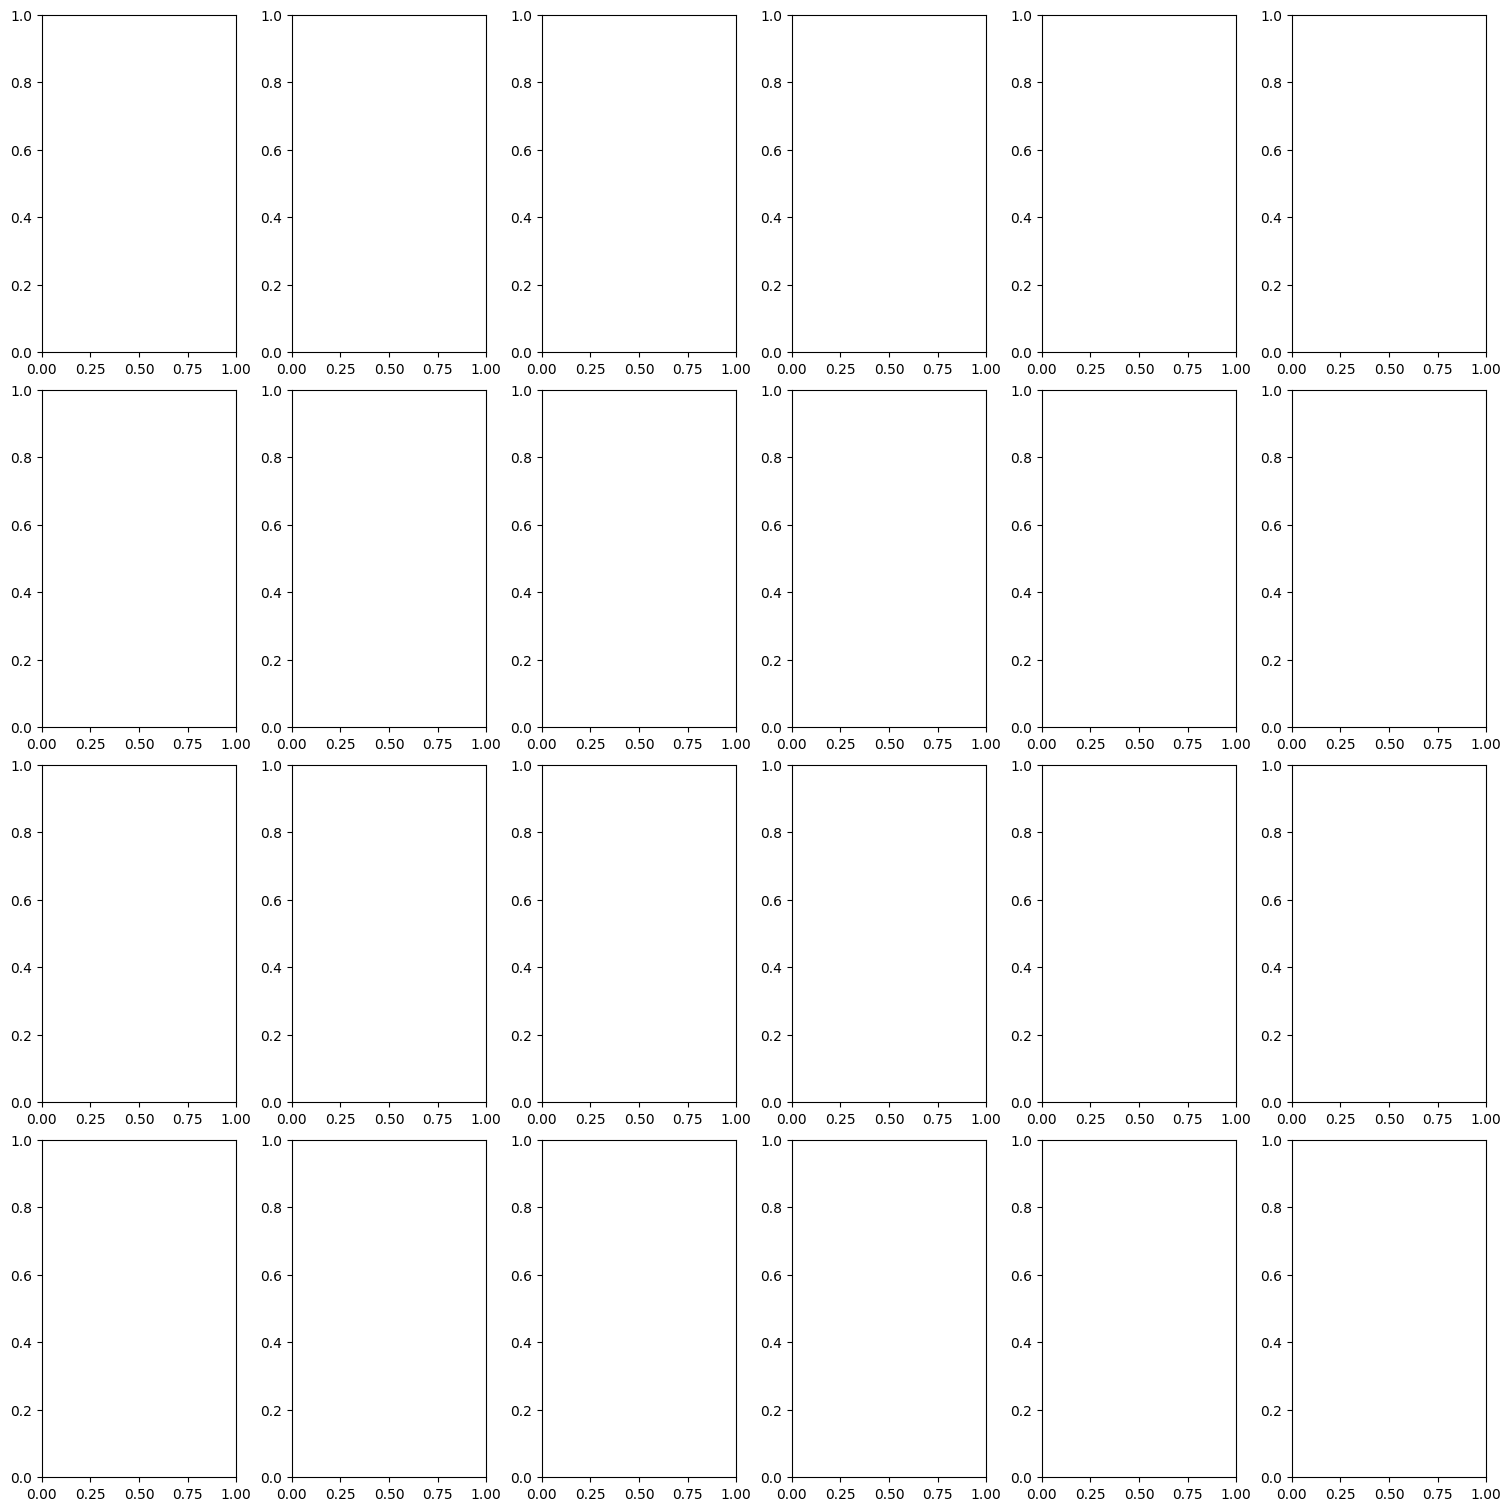

In [12]:
import cv2
import cv2
import pydicom
import matplotlib
import matplotlib.pyplot as plt
def crop_image_from_gray(img, tol =7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1), mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1), mask.any(0))].shape[0]
        if (check_shape == 0): #image is too dark that we crop out everything
            return img 
        else:
            img1 = img[:,:,0][np.ix_(mask.any(1), mask.any(0))]
            img2 = img[:,:,1][np.ix_(mask.any(1), mask.any(0))]
            img3 = img[:,:,2][np.ix_(mask.any(1), mask.any(0))]
            img = np.stack([img1,img2,img3], axis = -1)
    return img

def view_images_aug(images, title ="", aug = None):
    width = 6
    height = 4
    fig,axs = plt.subplots(height, width, figsize =(15,15), constrained_layout=True)
    for im in range(0, height*width):
        data = cv2.imread('D:/downloads' + '/jpeg/train' + 'ISIC_0164297.jpg')
        print(data)
        image = data.pixel_array
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #conversion from BGR image to RGB channel image
        image = cv2.resize(image, (256,256)) 
        image = crop_image_from_gray(image)

        
        i = im // width
        j = im % width
        axs[i,j].imshow(image,cmap = plt.cm.bone)
        axs[i,j].axis('off')
    
    plt.subplots_adjust(wspace =0,hspace =0)
    plt.suptitle(title)
    
view_images_aug(train_df_1, title = "Lentigo's Growth")   

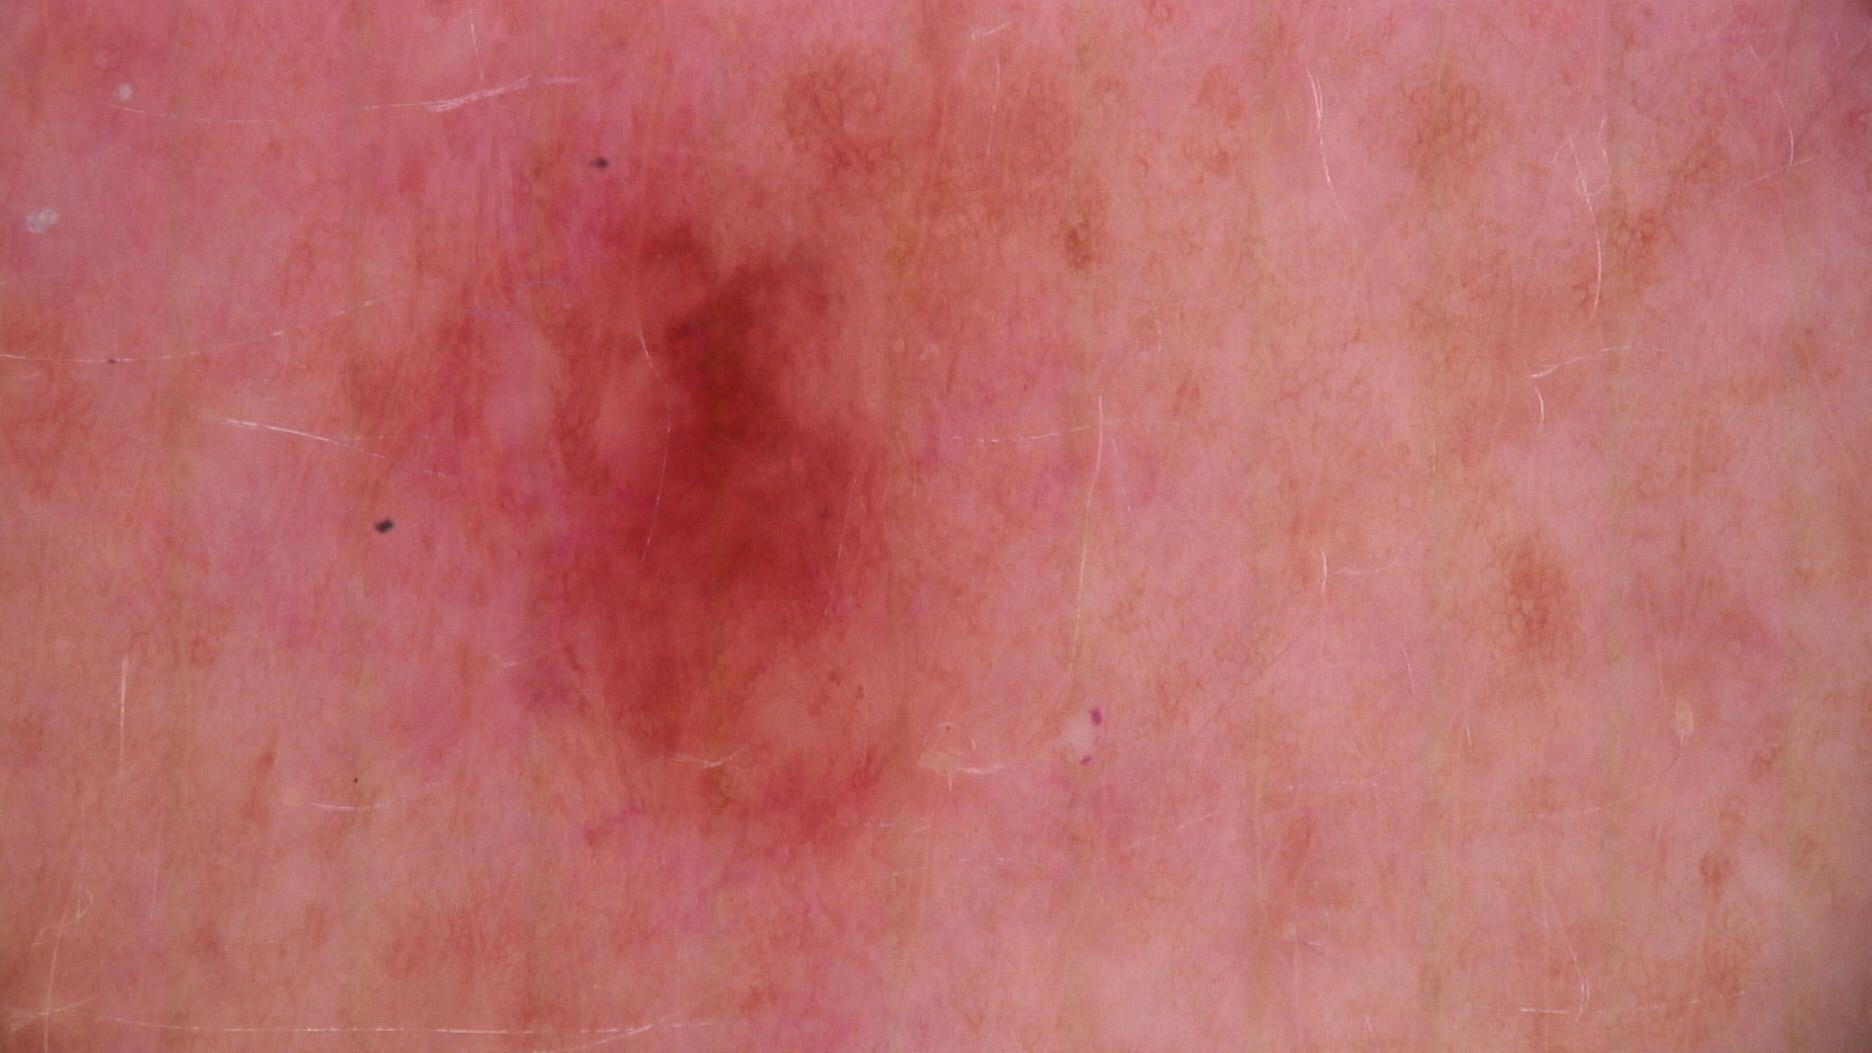

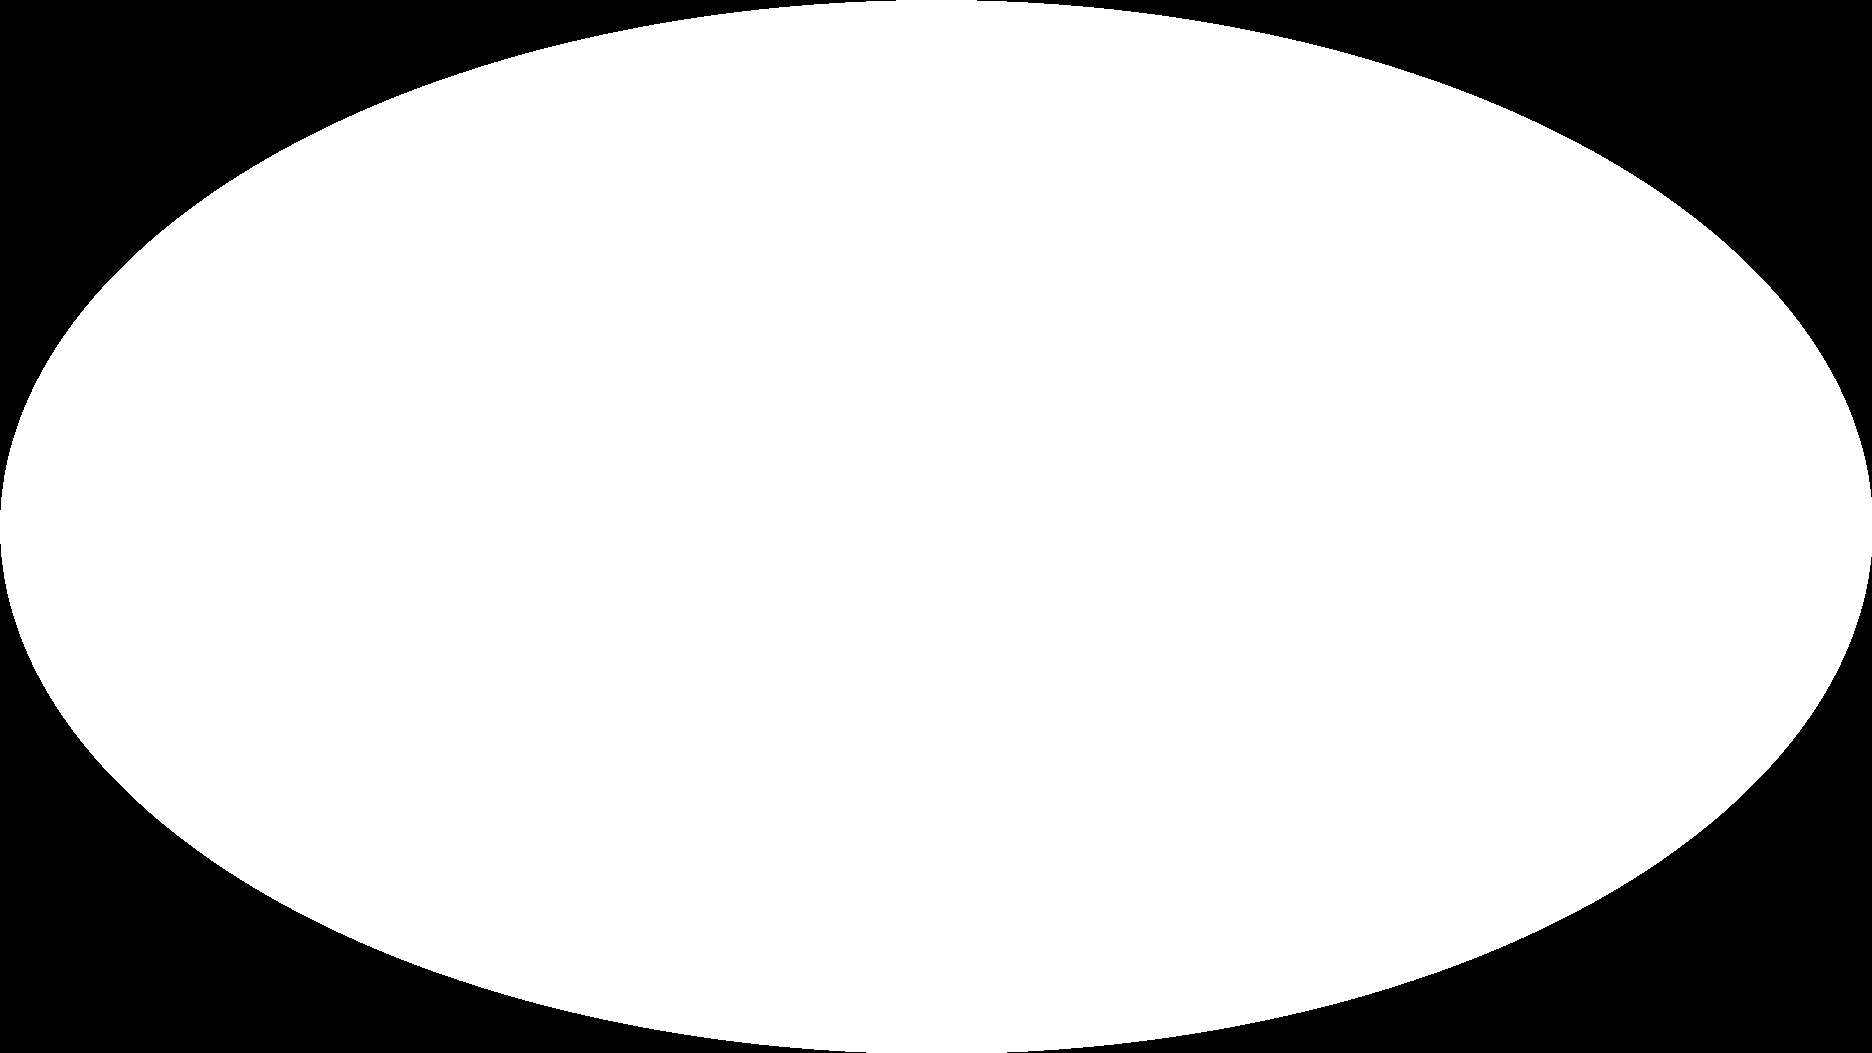

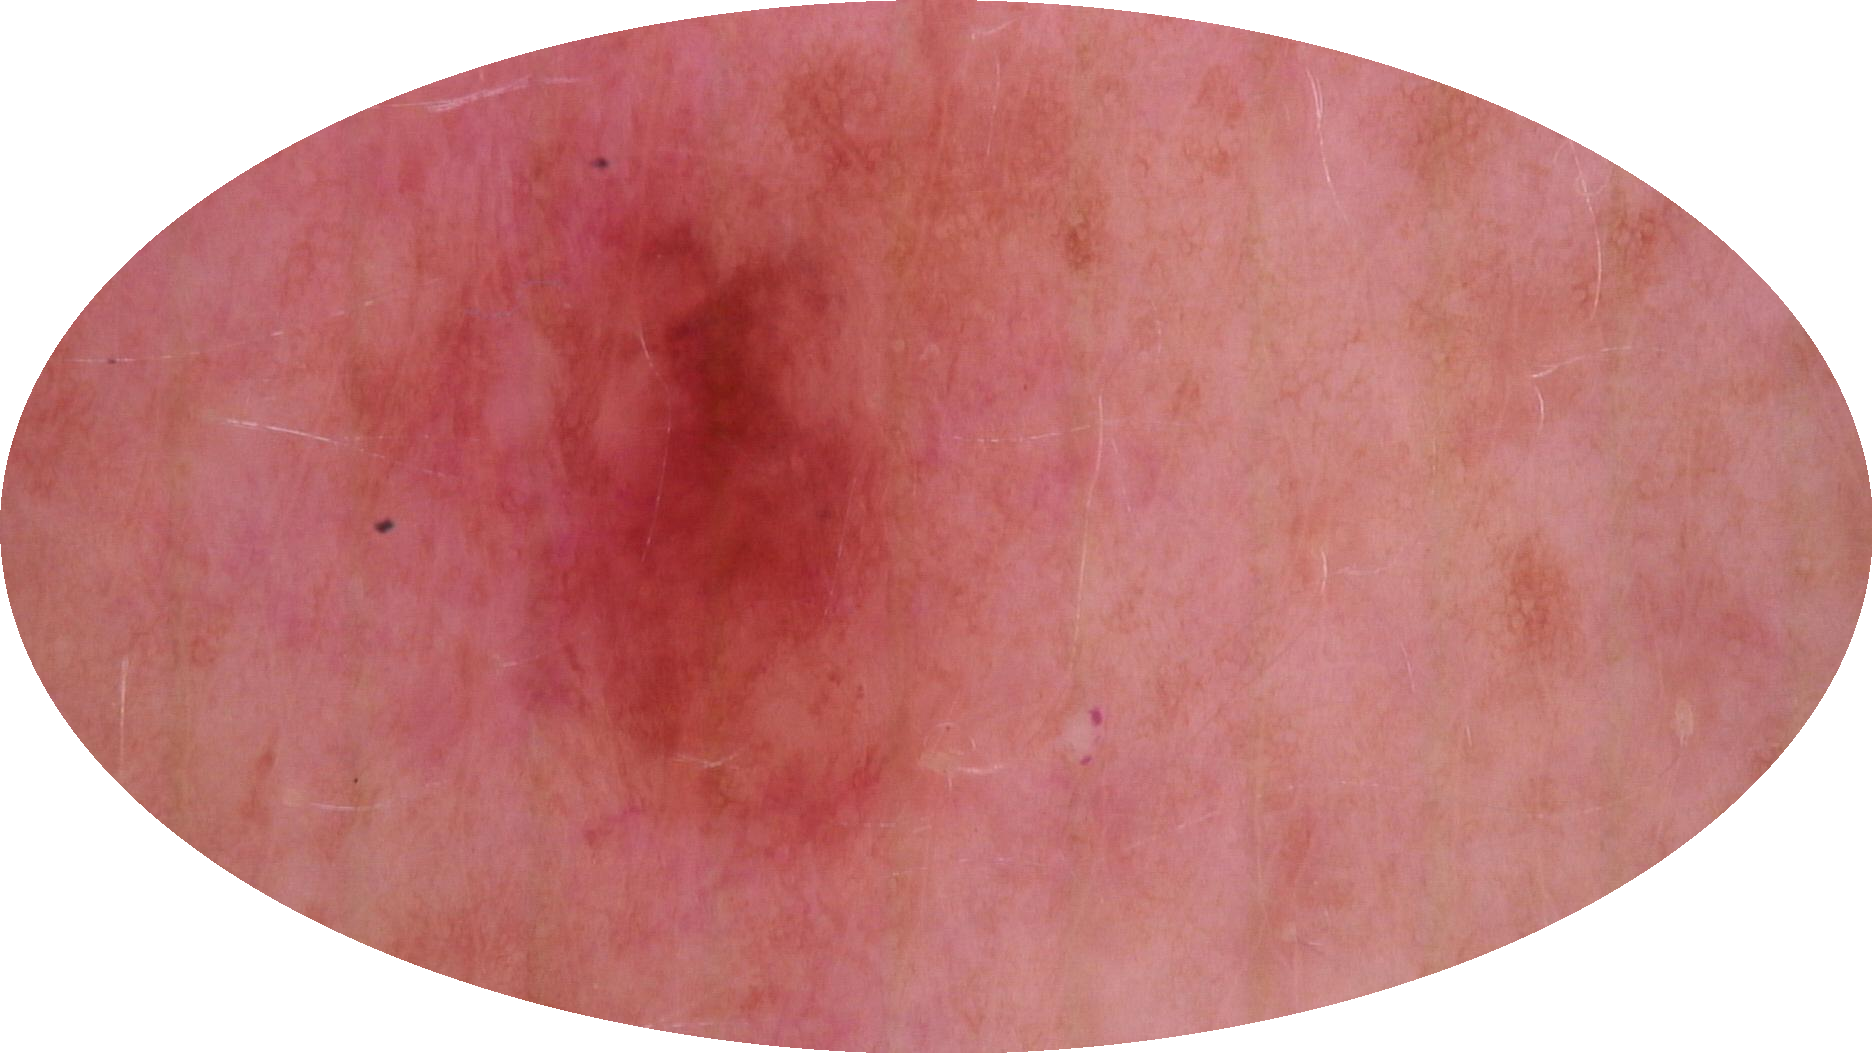

In [14]:
import numpy as np
from PIL import Image, ImageDraw
  
img=Image.open('D:/downloads' + '/jpeg/train' + '/ISIC_0164297.jpg')
display(img)
  
height,width = img.size
lum_img = Image.new('L', [height,width] , 0)
  
draw = ImageDraw.Draw(lum_img)
draw.pieslice([(0,0), (height,width)], 0, 360, 
              fill = 255, outline = "white")
img_arr =np.array(img)
lum_img_arr =np.array(lum_img)
display(Image.fromarray(lum_img_arr))
final_img_arr = np.dstack((img_arr,lum_img_arr))
display(Image.fromarray(final_img_arr))

In [7]:
import cv2
import numpy as np

base_url = "D:/downloads"
image_path = "/jpeg/train"
 
img = cv2.imread(base_url + image_path + '/ISIC_0327406.jpg')
#print(img.shape) # Print image shape
cv2.imshow(img)
 
# Cropping an image
cropped_image = img[80:280, 150:330]
 
# Display cropped image
cv2.imshow("cropped", cropped_image)
 
# Save the cropped image
cv2.imwrite("Cropped Image.jpg", cropped_image)
 
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [6]:
M = 76
N = 104
x1 = 0
y1 = 0
 
for y in range(0, imgheight, M):
    for x in range(0, imgwidth, N):
        if (imgheight - y) < M or (imgwidth - x) < N:
            break
             
        y1 = y + M
        x1 = x + N
 
        # check whether the patch width or height exceeds the image width or height
        if x1 >= imgwidth and y1 >= imgheight:
            x1 = imgwidth - 1
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif y1 >= imgheight: # when patch height exceeds the image height
            y1 = imgheight - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        elif x1 >= imgwidth: # when patch width exceeds the image width
            x1 = imgwidth - 1
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)
        else:
            #Crop into patches of size MxN
            tiles = image_copy[y:y+M, x:x+N]
            #Save each patch into file directory
            cv2.imwrite('saved_patches/'+'tile'+str(x)+'_'+str(y)+'.jpg', tiles)
            cv2.rectangle(img, (x, y), (x1, y1), (0, 255, 0), 1)

NameError: name 'imgheight' is not defined

In [13]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow.compat.v1 as tfc

sess = tfc.InteractiveSession()

#sess = tf.InteractiveSession()

img1 = np.random.random([400, 600, 3])
img2 = np.random.random([400, 600, 3])
img3 = np.random.random([400, 600, 3])

images = [img1, img2, img3]

img1_crop = [100, 100, 100, 100]
img2_crop = [200, 150, 100, 100]
img3_crop = [150, 200, 100, 100]

crop_values = [img1_crop, img2_crop, img3_crop]

def crop_image(img, crop):
    tf.image.crop_to_bounding_box(img,
                                  crop[0],
                                  crop[1],
                                  crop[2],
                                  crop[3])


image_placeholder = tf.placeholder("float", [None, 400, 600, 3])
crop_placeholder = tf.placeholder(dtype=tf.int32)
sess.run(tf.global_variables_initializer())

cropped_image = tf.map_fn(lambda img, crop: crop_image(img, crop), elems=[image_placeholder, crop_placeholder])
result = sess.run(cropped_image, feed_dict={image_placeholder: images, crop_placeholder:crop_values})

plt.imshow(result)
plt.show()

ModuleNotFoundError: No module named 'tensorflow.compat'